# Machine Learning Life Cycle
### Steps

# 1. Preprocess + EDA + Feature Selection
# 2. Extract input and output cols
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/model selection
# 7. Deploy the model

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/placement.csv')

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.shape

(100, 4)

Removing the Unnamed column. This is the only thing we can do in preprocessing.

In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt


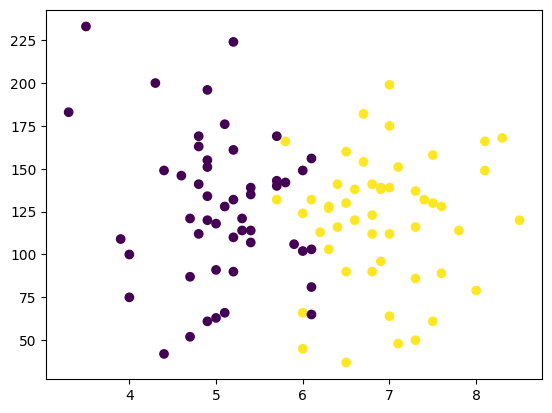

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Train test split

Separte input (Independent Variables) & output (dependent variable)

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

test_size= 10 % test and 90 % training data

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
17,3.3,183.0
70,6.3,127.0
24,4.7,121.0
69,8.5,120.0
56,6.1,65.0
...,...,...
71,6.1,132.0
34,4.8,163.0
94,4.7,52.0
38,6.5,160.0


In [21]:
y_train

,placement
17,0
70,1
24,0
69,1
56,0
...,...
71,1
34,0
94,0
38,1


In [22]:
X_test

,cgpa,iq
49,5.4,135.0
47,5.2,161.0
75,4.8,169.0
97,6.7,182.0
36,5.7,140.0
87,5.7,132.0
60,6.9,139.0
89,4.9,151.0
62,6.0,102.0
64,7.0,64.0


Scale the values between -1 to 1. Here it is not required as we have simple data, but there is no harm of scaling the values.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[-2.31386376,  1.51685858],
       [ 0.24865968,  0.12357131],
       [-1.11801949, -0.02570947],
       [ 2.12784354, -0.0505896 ],
       [ 0.07782479, -1.41899674],
       [-0.09301011, -0.39891141],
       [ 0.67574692,  0.47189313],
       [-0.69093225,  0.24797196],
       [ 1.10283416, -1.79219869],
       [ 0.76116437, -0.64771271],
       [-1.71594162, -1.17019544],
       [-0.86176714, -1.468757  ],
       [ 0.67574692, -0.79699349],
       [ 1.27366906,  0.89485534],
       [ 1.78617375,  1.09389637],
       [ 0.33407713,  0.47189313],
       [-0.52009735,  0.42213287],
       [-0.17842756,  0.49677326],
       [ 1.27366906, -1.51851726],
       [ 0.76116437,  0.39725274],
       [-0.52009735, -0.19987038],
       [-0.94718459,  0.82021495],
       [ 1.78617375,  0.67093417],
       [-0.6055148 , -0.02570947],
       [ 1.95700864,  1.14365663],
       [-1.45968928,  1.93982079],
       [ 0.67574692, -0.24963064],
       [ 1.5299214 , -0.19987038],
       [ 0.16324223,

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[-0.52009735,  0.32261235],
       [-0.69093225,  0.96949573],
       [-1.03260204,  1.16853676],
       [ 0.59032947,  1.49197845],
       [-0.26384501,  0.447013  ],
       [-0.26384501,  0.24797196],
       [ 0.76116437,  0.42213287],
       [-0.94718459,  0.72069443],
       [-0.00759266, -0.49843193],
       [ 0.84658182, -1.44387687]])

Model Selection & Training= Logistic Regression used here

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

Model Evaluation

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [34]:
y_test

,placement
49,0
47,0
75,0
97,1
36,0
87,1
60,1
89,0
62,0
64,1


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.8

Model is 80% accurate.

How to plot decision boundary? Take help of library (mlxten.plotting)

In [37]:
from mlxtend.plotting import plot_decision_regions

X_tain already numpy array as we already apply scaling on it but y train is not numpy array so used .values with it

<Axes: >

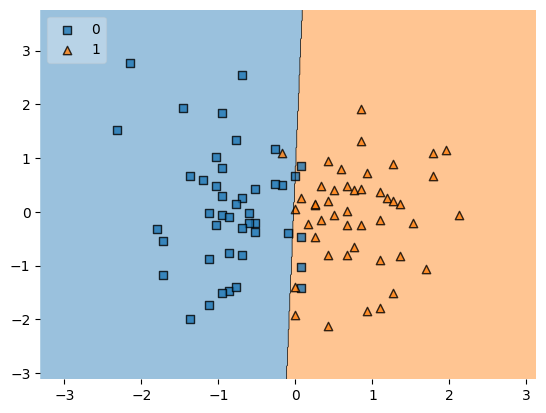

In [38]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

Now, if you are satisfied with the model performance and want to deploy it, you have to convert your model into binary file. As everything is object in python so pickle convert object into file.

In [39]:
import pickle

In [40]:
pickle.dump(clf,open('Model.pkl','wb'))

Model deplyment will do later.
Options for model deployment, Heroku, AWS, GCP